In [1]:
import numpy as np
import wave
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import fft
import math
import makeFeature

In [2]:
name = "./CoinData/001-00.wav"
wavefile = wave.open(name, "r")
framerate = wavefile.getframerate()
data = wavefile.readframes(wavefile.getnframes())
x = np.frombuffer(data, dtype="int16")
x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない

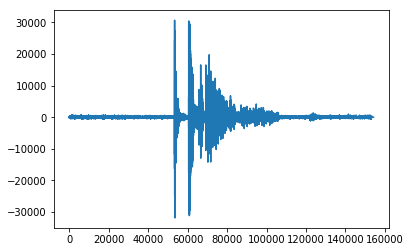

In [3]:
plt.plot(x)

In [4]:
BinSize = 0.05 * framerate

In [5]:
len(x) / framerate

3.49734693877551

In [6]:
from makeFeature import makeFeature

In [7]:
coins = ["001", "005", "010", "050", "100", "500"]
OnPeriods = 20

features = np.zeros([6, 20, OnPeriods, 1858])
for coinIndex, coin in enumerate(coins) :
    for i in range(0, 20) :
        padded = '%02d' % i
        filename = "./CoinData/" + coin + "-" + padded + ".wav"
        #### print(filename)
        wavefile = wave.open(filename, "r")
        framerate = wavefile.getframerate()
        data = wavefile.readframes(wavefile.getnframes())
        wavefile.close()
        x = np.frombuffer(data, dtype="int16")
        x = x.astype('float64') #### 初めからfloat64にすると、ファイル形式の関係上欲しいデータが得られない
        
        f = makeFeature(x, framerate)
        
        features[coinIndex, i, :, :] = f

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


In [8]:
import numpy as np
np.float64

numpy.float64

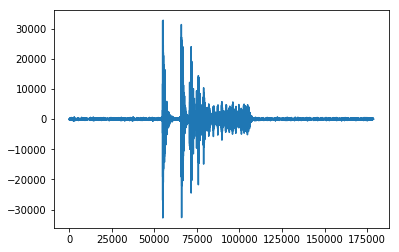

In [9]:
plt.plot(x)

In [10]:
"""
def extFeature(feature, freqs) :
    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して
    # OnPeriods * len(freqs)の特徴として返す
    numFreqs = len(freqs)
    f = np.zeros(OnPeriods * numFreqs)
    for index, l in enumerate(feature) :
        f[index * numFreqs : (index + 1) * numFreqs] = l[freqs]
        
    return f
"""

'\ndef extFeature(feature, freqs) :\n    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して\n    # OnPeriods * len(freqs)の特徴として返す\n    numFreqs = len(freqs)\n    f = np.zeros(OnPeriods * numFreqs)\n    for index, l in enumerate(feature) :\n        f[index * numFreqs : (index + 1) * numFreqs] = l[freqs]\n        \n    return f\n'

In [11]:
"""
def extFeature2(feature, freqs) :
    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して
    # len(freqs)の特徴として返す
    numFreqs = len(freqs)
    f = np.zeros(numFreqs)
    for index, l in enumerate(feature) :
        f[:] += l[freqs]
        
    return f
"""

'\ndef extFeature2(feature, freqs) :\n    # OnPeriods * 1858の特徴を受け取り、freqsで指定された周波数成分を選択して\n    # len(freqs)の特徴として返す\n    numFreqs = len(freqs)\n    f = np.zeros(numFreqs)\n    for index, l in enumerate(feature) :\n        f[:] += l[freqs]\n        \n    return f\n'

In [12]:
"""
def detectFreqs(features, numFreqs) :
    # numFreqsで指定した個数の周波数成分を、コストが最小になるように決定する
    freqs = np.array(range(0, numFreqs)).astype('int64')
    numCoins = features.shape[0]
    
    featuresSelected = np.zeros([numCoins, features.shape[1], features.shape[2] * numFreqs])
    for c in range(0, numCoins) :
        for cc in range(0, features.shape[1]) :
            featuresSelected[c, cc, :] = extFeature(features[c, cc, :, :], freqs)
    
    numFeature = features.shape[2] * numFreqs
    mu = np.zeros([numCoins, numFeature])
    sigma = np.zeros([numCoins, numFeature, numFeature])
    
    for c in range(0, numCoins) :
        tempF = featuresSelected[c, :, :]
        mu[c, :] = makeMu(tempF)
        sigma[c, :, :] = makeSigma(tempF)
        print(np.linalg.eig(sigma[c])[0])
        
    culR(featuresSelected, sigma, mu)
        
    return freqs
"""

"\ndef detectFreqs(features, numFreqs) :\n    # numFreqsで指定した個数の周波数成分を、コストが最小になるように決定する\n    freqs = np.array(range(0, numFreqs)).astype('int64')\n    numCoins = features.shape[0]\n    \n    featuresSelected = np.zeros([numCoins, features.shape[1], features.shape[2] * numFreqs])\n    for c in range(0, numCoins) :\n        for cc in range(0, features.shape[1]) :\n            featuresSelected[c, cc, :] = extFeature(features[c, cc, :, :], freqs)\n    \n    numFeature = features.shape[2] * numFreqs\n    mu = np.zeros([numCoins, numFeature])\n    sigma = np.zeros([numCoins, numFeature, numFeature])\n    \n    for c in range(0, numCoins) :\n        tempF = featuresSelected[c, :, :]\n        mu[c, :] = makeMu(tempF)\n        sigma[c, :, :] = makeSigma(tempF)\n        print(np.linalg.eig(sigma[c])[0])\n        \n    culR(featuresSelected, sigma, mu)\n        \n    return freqs\n"

In [13]:
"""
#### 特徴ベクトルを足すことで次元を増やさないようにしてみる
def detectFreqs2(features, numFreqs) :
    freqs = np.array(range(0, numFreqs)).astype('int64')
    numCoins = features.shape[0]
    
    featuresSelected = np.zeros([numCoins, features.shape[1], numFreqs])
    for c in range(0, numCoins) :
        for cc in range(0, features.shape[1]) :
            featuresSelected[c, cc, :] = extFeature2(features[c, cc, :, :], freqs)
            
            
    numFeature = numFreqs
    mu = np.zeros([numCoins, numFeature])
    sigma = np.zeros([numCoins, numFeature, numFeature])
    
    for c in range(0, numCoins) :
        tempF = featuresSelected[c, :, :]
        mu[c, :] = makeMu(tempF)
        sigma[c, :, :] = makeSigma(tempF)
        print(sigma[c])
        print(np.linalg.det(sigma[c]))
        
    freqs_new = np.array(range(0, numFreqs)).astype('int64')
    
    #### 周波数成分選択アルゴリズム
    while(True) :
        for d in range(0, numFreqs) :
            for omega in range(0, features.shape[3]) :
                if omega
                
    R = culR(featuresSelected, sigma, mu)
    
    return freqs
"""

"\n#### 特徴ベクトルを足すことで次元を増やさないようにしてみる\ndef detectFreqs2(features, numFreqs) :\n    freqs = np.array(range(0, numFreqs)).astype('int64')\n    numCoins = features.shape[0]\n    \n    featuresSelected = np.zeros([numCoins, features.shape[1], numFreqs])\n    for c in range(0, numCoins) :\n        for cc in range(0, features.shape[1]) :\n            featuresSelected[c, cc, :] = extFeature2(features[c, cc, :, :], freqs)\n            \n            \n    numFeature = numFreqs\n    mu = np.zeros([numCoins, numFeature])\n    sigma = np.zeros([numCoins, numFeature, numFeature])\n    \n    for c in range(0, numCoins) :\n        tempF = featuresSelected[c, :, :]\n        mu[c, :] = makeMu(tempF)\n        sigma[c, :, :] = makeSigma(tempF)\n        print(sigma[c])\n        print(np.linalg.det(sigma[c]))\n        \n    freqs_new = np.array(range(0, numFreqs)).astype('int64')\n    \n    #### 周波数成分選択アルゴリズム\n    while(True) :\n        for d in range(0, numFreqs) :\n            for omega in range(0, feature

適当に小さいデータで実験

周波数成分　だいたい 400Hz以下

特徴次元数10

In [14]:
from makeFeature import makePrediction

In [15]:
from makeFeature import detectFreqs

In [ ]:
freqs, sigma, mu, detSigma, invSigma = detectFreqs(features[:, 0:15, :, 0:100], 20)

preparation
main loop start
********************************
major loop
--------------------------------
('minor minor loop : ', 0.0007259845733642578)
('minor minor loop : ', 0.557528018951416)
('minor minor loop : ', 1.0967254638671875e-05)
('minor minor loop : ', 1.4066696166992188e-05)
('minor minor loop : ', 1.0967254638671875e-05)
('minor minor loop : ', 2.002716064453125e-05)
('minor minor loop : ', 1.0967254638671875e-05)
('minor minor loop : ', 5.7220458984375e-06)
('minor minor loop : ', 1.0013580322265625e-05)
('minor minor loop : ', 6.198883056640625e-06)
('minor minor loop : ', 6.9141387939453125e-06)
('minor minor loop : ', 1.9073486328125e-05)
('minor minor loop : ', 1.0013580322265625e-05)
('minor minor loop : ', 1.2159347534179688e-05)
('minor minor loop : ', 1.52587890625e-05)
('minor minor loop : ', 1.0013580322265625e-05)
('minor minor loop : ', 5.9604644775390625e-06)
('minor minor loop : ', 5.245208740234375e-06)
('minor minor loop : ', 4.76837158203125e-06)
('min

In [ ]:
features.shape

In [ ]:
%timeit makePrediction(features[0][0][:, freqs], sigma, mu)

In [ ]:
acc = 0
for c in range(0, 6) :
    for cc in range(15, 20) :
        predicted = makePrediction(features[c][cc][:, freqs], sigma=sigma, mu=mu)
        if(predicted == c) :
            acc += 1
            
acc /= (5 * 6)

In [26]:
acc

0.5

期待値 0.166...での正解率0.5

そこそこ当たってそう

本番

非常に時間がかかることが予想される

In [35]:
D = 2
freqs, sigma, mu = detectFreqs(features, D)

preparation
main loop start
********************************
major loop
--------------------------------
('minor loop : ', 0)
('Selected freqs', array([5, 1]))
('R=', 0.9968268453097271)
--------------------------------
('minor loop : ', 1)
('Selected freqs', array([5, 4]))
('R=', 0.9956835361266605)
--------------------------------
********************************
major loop
--------------------------------
('minor loop : ', 0)
('Selected freqs', array([5, 4]))
('R=', 0.9956835361266605)
--------------------------------
('minor loop : ', 1)
('Selected freqs', array([5, 4]))
('R=', 0.9956835361266605)
--------------------------------
done


In [9]:
import numpy as np
from numpy import fft

In [13]:
temp = fft.fft([0, 1, 2, 3, 4])

In [15]:
np.abs(temp)

array([ 10.        ,   4.25325404,   2.62865556,   2.62865556,   4.25325404])

そもそもの計算が正しいか簡単に確認

In [13]:
def culR(feature, sigma, mu) :
    detSigma = np.linalg.det(sigma)
    invSigma = np.linalg.inv(sigma)
    d = sigma.shape[0]
    x_muc = np.matrix(feature - mu).T

    res = ((2 * np.pi) ** (-d / 2.0) * detSigma ** (-0.5) * np.exp(-x_muc.T.dot(invSigma).dot(x_muc) / 2))
    
    return res

In [27]:
culR(np.array([0, 0]), np.array([[1, 0], [0, 1]]) * 0.1, np.array([0, 0]))

matrix([[ 1.59154943]])

In [20]:
np.linalg.inv((np.array([[1, 0], [0, 1]])))

array([[ 1.,  0.],
       [ 0.,  1.]])

In [24]:
x = np.array([0, 0])
mu = np.array([0, 0])
x_muc = np.matrix(x - mu).T
sigma = np.array([[1, 0], [0, 1]]) * 100
invSigma = np.linalg.inv(sigma)

np.exp(-x_muc.T.dot(invSigma).dot(x_muc) / 2)

matrix([[ 1.]])